# Visualización 3D con Coordenadas Homogéneas y Proyecciones

En este notebook exploraremos:
1. Representación de puntos en 3D con coordenadas homogéneas
2. Implementación de matrices de proyección ortogonal y perspectiva
3. Visualización del efecto de estas proyecciones
4. Efecto de la variación de la distancia focal en proyección perspectiva

In [1]:
%pip install matplotlib mpl_toolkits

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Representación de puntos 3D con coordenadas homogéneas

Las coordenadas homogéneas añaden una dimensión extra (normalmente 1) para permitir representar transformaciones como traslaciones con multiplicación de matrices.

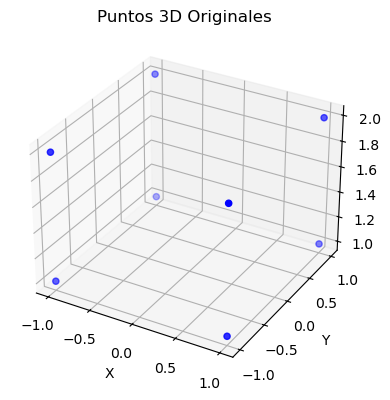

In [9]:
# Definimos algunos puntos 3D y sus coordenadas homogéneas
puntos_3d = np.array([
    [1, 1, 1],
    [1, -1, 1],
    [-1, -1, 1],
    [-1, 1, 1],
    [1, 1, 2],
    [1, -1, 2],
    [-1, -1, 2],
    [-1, 1, 2]
]).T

# Convertimos a coordenadas homogéneas (añadiendo fila de 1s)
puntos_homogeneos = np.vstack((puntos_3d, np.ones(puntos_3d.shape[1])))

# Visualización 3D
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(puntos_3d[0], puntos_3d[1], puntos_3d[2], c='b', marker='o')
ax.set_title('Puntos 3D Originales')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.show()

## 2. Matrices de Proyección

Implementaremos dos tipos de proyección:
- Ortogonal: Mantiene paralelas las líneas paralelas
- Perspectiva: Introduce el efecto de "punto de fuga"

In [6]:
def proyeccion_ortogonal(puntos):
    """Proyección ortogonal eliminando la coordenada z"""
    P = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1]
    ])
    puntos_proy = P @ puntos
    return puntos_proy[:3]  # Devolvemos solo x, y, z (z=0)

def proyeccion_perspectiva(puntos, d=1.0):
    """Proyección perspectiva con distancia focal d"""
    P = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 1/d, 0]
    ])
    puntos_proy = P @ puntos
    puntos_proy = puntos_proy / puntos_proy[-1]  # Normalización homogénea
    return puntos_proy[:3]  # Devolvemos x, y, z

## 3. Visualización de Proyecciones

Comparemos el efecto de ambas proyecciones sobre nuestros puntos 3D.

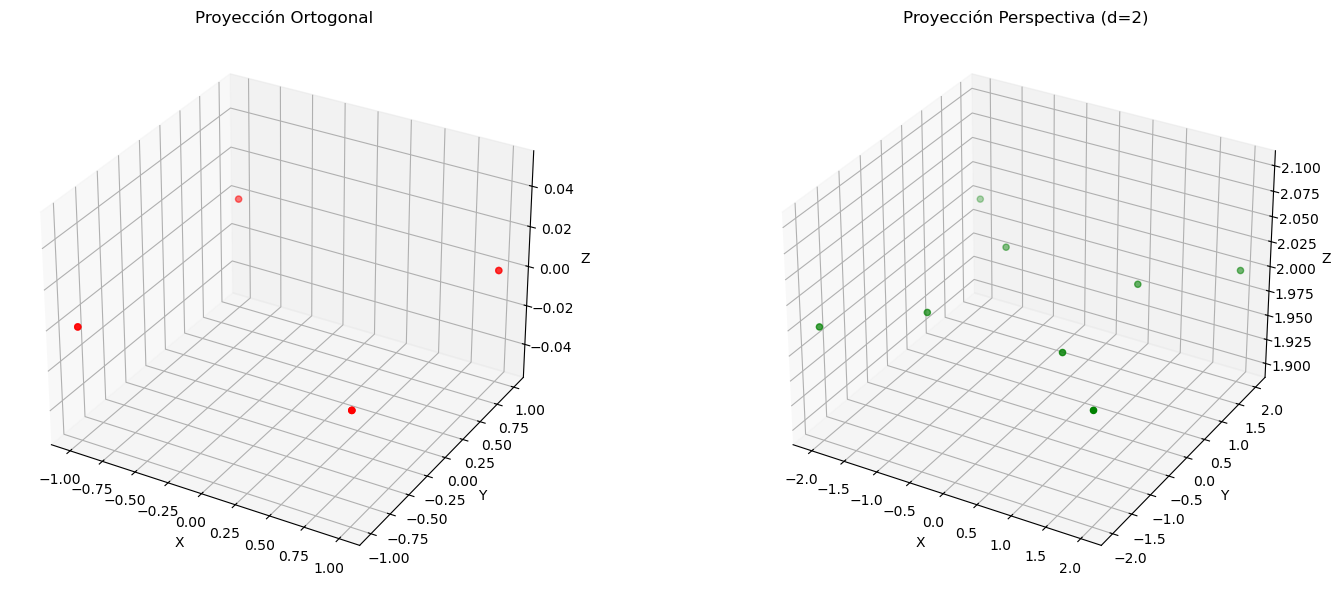

In [7]:
# Aplicamos ambas proyecciones
puntos_ortog = proyeccion_ortogonal(puntos_homogeneos)
puntos_persp = proyeccion_perspectiva(puntos_homogeneos, d=2.0)

# Visualización
fig = plt.figure(figsize=(16, 6))

# Proyección Ortogonal
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(puntos_ortog[0], puntos_ortog[1], puntos_ortog[2], c='r', marker='o')
ax1.set_title('Proyección Ortogonal')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Proyección Perspectiva
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(puntos_persp[0], puntos_persp[1], puntos_persp[2], c='g', marker='o')
ax2.set_title('Proyección Perspectiva (d=2)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()

## 4. Efecto de la Distancia Focal

Veamos cómo afecta la distancia focal (d) a la proyección perspectiva.

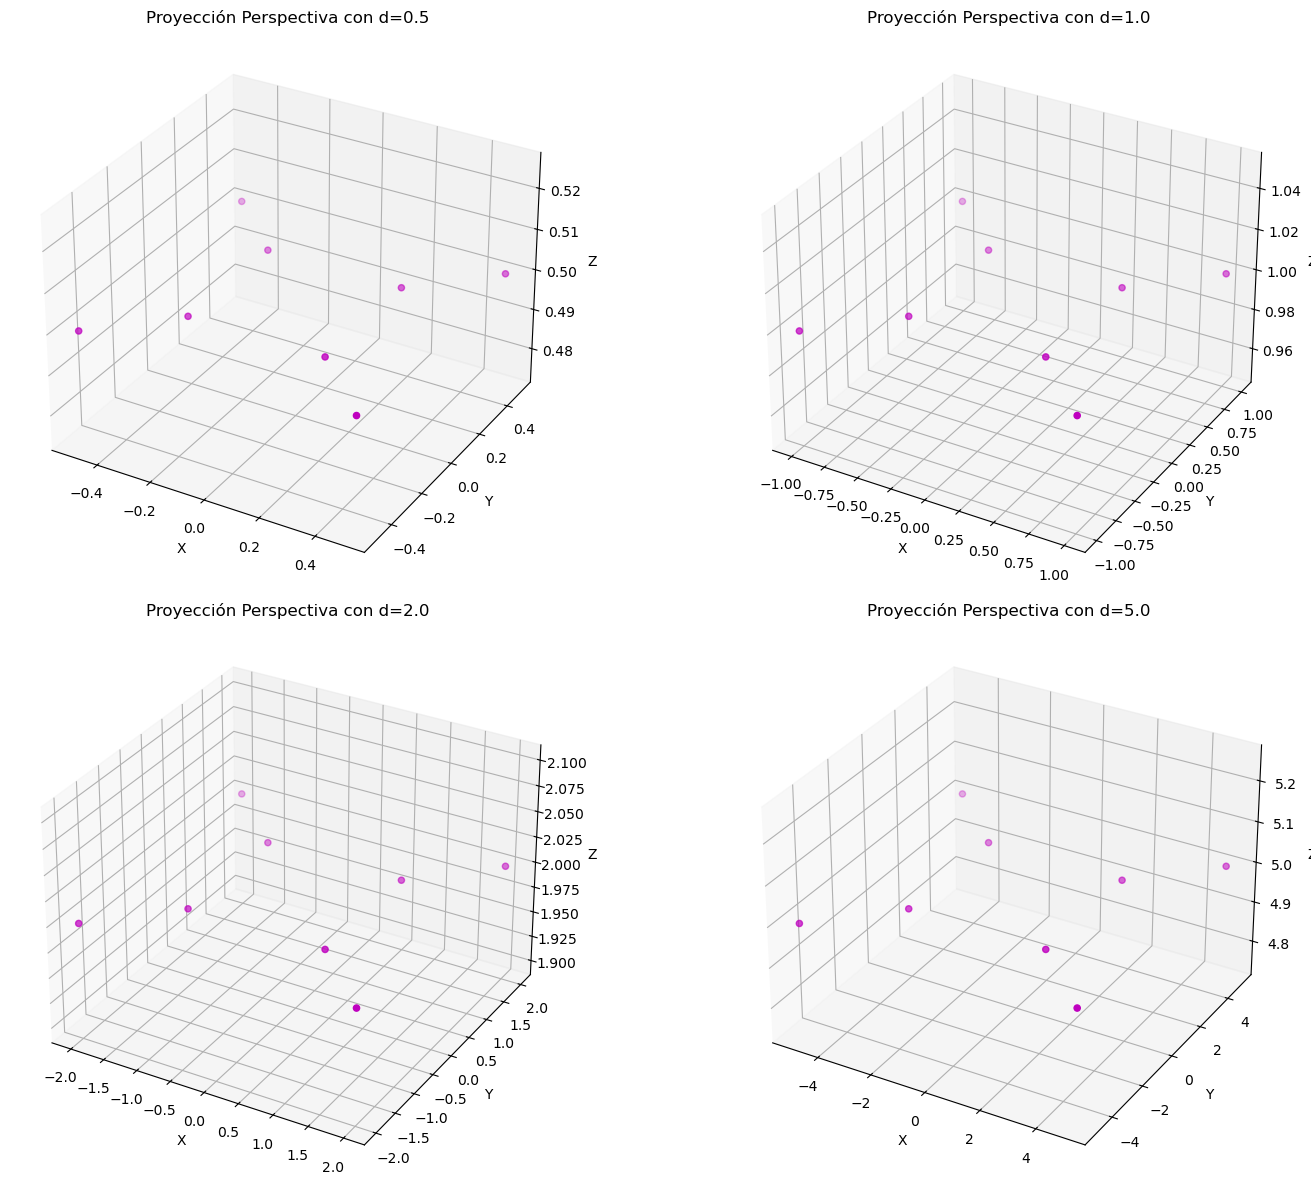

In [8]:
# Probamos diferentes distancias focales
distancias = [0.5, 1.0, 2.0, 5.0]

fig = plt.figure(figsize=(16, 12))
for i, d in enumerate(distancias, 1):
    puntos_persp = proyeccion_perspectiva(puntos_homogeneos, d)
    
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.scatter(puntos_persp[0], puntos_persp[1], puntos_persp[2], c='m', marker='o')
    ax.set_title(f'Proyección Perspectiva con d={d}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.tight_layout()
plt.show()

## Conclusión

Hemos visto:
- Cómo representar puntos en 3D con coordenadas homogéneas
- La implementación de proyecciones ortogonal y perspectiva
- El efecto visual de cada proyección
- Cómo la distancia focal afecta la distorsión perspectiva

Podemos observar que:
- La proyección ortogonal mantiene paralelas las líneas paralelas
- La proyección perspectiva crea un efecto de punto de fuga
- A menor distancia focal, mayor distorsión perspectiva